# DATA CLEANING

DIAGNOSE DATA for CLEANING
We need to diagnose and clean data before exploring. 
Unclean data:

- Column name inconsistency like upper-lower case letter or space between words
- missing data
- different language

We will use head, tail, columns, shape and info methods to diagnose data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('pokemon.csv')

In [121]:
# shows first 5 rows
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
# shows last 5 rows
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [6]:
# name of columns - features
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [9]:
# number of rows and columns
data.shape

(800, 12)

In [10]:
# info gives data type like dataframe, number of samples or rows, 
# number of features or columns, features types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


## EXPLORATORY DATA ANALYSIS

value_counts(): Frequency counts 
outliers: the value that is considerably higher or lower from rest of the data

### Outliers
Lets say value at 75% is Q3 and value at 25% is Q1.
Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR 

### Describe
We will use describe() method. Describe method includes:
count: number of entries
mean: average of entries
std: standart deviation
min: minimum entry
25%: first quantile
50%: median or second quantile
75%: third quantile
max: maximum entry

What is quantile?

1,4,5,6,8,9,11,12,13,14,15,16,17
The median is the number that is in middle of the sequence. In this case it would be 11.

The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.

The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.

In [11]:
# For example lets look frequency of pokemom types
print(data['Type 1'].value_counts(dropna =False))  # if there are nan values that also be counted
# As it can be seen below there are 112 water pokemon or 70 grass pokemon

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [13]:
data.describe() #ignore null entries

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## VISUAL EXPLORATORY DATA ANALYSIS¶


- Box plots: visualize basic statistics like outliers, min/max or quantiles


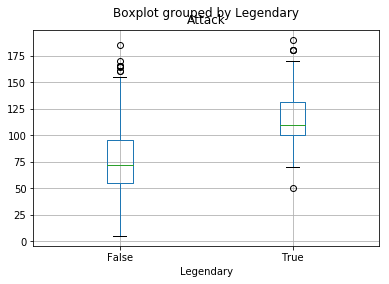

In [122]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
%matplotlib inline
data.boxplot(column='Attack',by = 'Legendary')


In [31]:
data['Attack'].loc[data['Legendary']==False].describe()

count    735.000000
mean      75.669388
std       30.490153
min        5.000000
25%       54.500000
50%       72.000000
75%       95.000000
max      185.000000
Name: Attack, dtype: float64

In [35]:
# False
Q1 = 54.5
Q3 = 95
# min outlier
print("min outlier: ", Q1 - 1.5*(Q3-Q1))
# max outlier
print("max outlier: ", Q3 + 1.5*(Q3-Q1))

min outlier:  -6.25
max outlier:  155.75


In [16]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## TIDY DATA

We tidy data with melt(). Describing melt is confusing. Therefore lets make example to understand it.

Actually 'melt' put column name in rows

In [39]:
data_new = data.head()

In [40]:
data_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [43]:
?pd.melt #help really helps :-)

In [42]:
# lets melt
# id_vars = what we do not wish to melt
# value_vars = what we want to melt
melted = pd.melt(frame=data_new, id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43


## PIVOTING DATA
Reverse of melting.

In [45]:
# Index is name
# I want to make that columns are variable
# Finally values in columns are value
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


## CONCATENATING DATA
We can concatenate two dataframe

In [46]:
# Firstly lets create 2 data frame
data1 = data.head()
data2= data.tail()
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [47]:
?pd.concat

In [49]:
data1 = data['Attack'].head()
data2 = data['Defense'].head()
conc_data_col = pd.concat([data1,data2], axis=1)
conc_data_col

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


## DATA TYPES

There are 5 basic data types: 
- object(string), boolean, integer, float and categorical. 
We can make conversion data types like from str to categorical or from int to float 
Why is category important:

make dataframe smaller in memory
can be utilized for anlaysis especially for sklear (we will learn later)

In [50]:
data.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## MISSING DATA and TESTING WITH ASSERT
If we encounter with missing data, what we can do:

- leave as is
- drop them with dropna()
- fill missing value with fillna()
- fill missing values with test statistics like mean 

Assert statement: check that you can turn on or turn off when you are done with your testing of the program

In [51]:
# Lets look at does pokemon data have nan value
# As you can see there are 800 entries. However Type 2 has 414 non-null object so it has 386 null object.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [72]:
data['Type 2'].value_counts(dropna=False)

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ghost       14
Water       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [56]:
# Lets drop nan values
data1 = data   # also we will use data to fill missing value so I assign it to data1 variable
data1["Type 2"].dropna(inplace = True)  # inplace = True means we do not assign it to new variable. Changes automatically assigned to data
# So does it work ?

In [64]:
data1.count()

#             800
Name          799
Type 1        800
Type 2        414
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

In [62]:
data1['Type 2'].value_counts(dropna=False)

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ghost       14
Water       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [88]:
assert data1['Type 2'].notnull().all()

In [89]:
assert data['Type 2'].notnull().all()

AssertionError: 

In [74]:
data['Type 2'].value_counts(dropna=False)

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Ghost        14
Water        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [90]:
# assert 
assert 1==1

In [91]:
assert 1==2

AssertionError: 

## VISUAL EXPLORATORY DATA ANALYSIS
- Plot
- Subplot
- Histogram:
    - bins: number of bins
    - range(tuble): min and max values of bins
    - normed(boolean): normalize or not
    - cumulative(boolean): compute cumulative distribution
- Boxplot

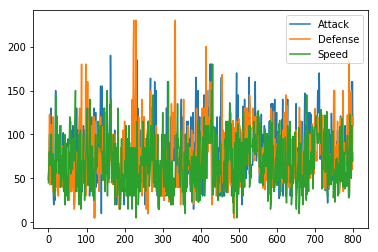

In [123]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
plt.show()

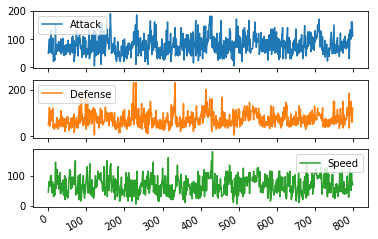

In [109]:
data1.plot(subplots=True)
plt.show() 

In [108]:
?plt.scatter

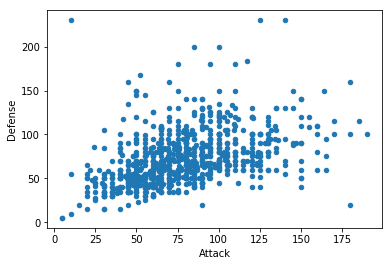

In [107]:
# scatter plot  
data1.plot(kind = "scatter", x="Attack", y = "Defense")
plt.show()

In [ ]:
plt.scatter

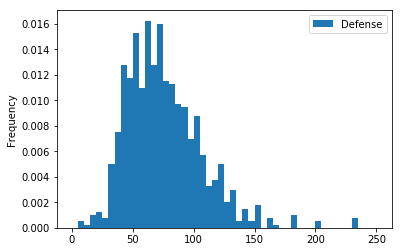

In [111]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True)
plt.show()

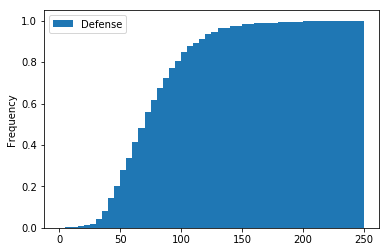

In [125]:
# hist plot  cumulative
data1.plot(kind = "hist",y = "Defense",bins = 50,
           range= (0,250),normed = True, cumulative = True)
plt.show()

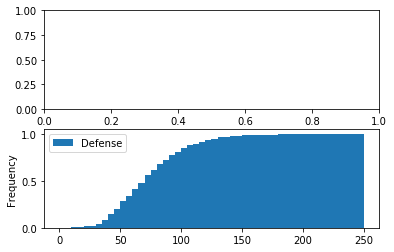

In [124]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),normed = True,ax = axes[1],cumulative = True)
#plt.savefig('graph.png')
plt.show()

## STATISTICAL EXPLORATORY DATA ANALYSIS

- count: number of entries
- mean: average of entries
- std: standart deviation
- min: minimum entry
- 25%: first quantile
- 50%: median or second quantile
- 75%: third quantile
- max: maximum entry

In [117]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Box plots: visualize basic statistics like outliers, min/max or quantiles

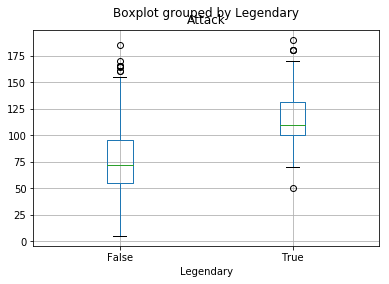

In [127]:
# For example: compare attack of pokemons that are legendary  or not
# Black line at top is max
# Blue line at top is 75%
# Red line is median (50%)
# Blue line at bottom is 25%
# Black line at bottom is min
# There are no outliers
data.boxplot(column='Attack',by = 'Legendary', )
plt.show()

In [129]:
?plt.boxplot

## NUMERICAL DATA DISTRIBUTION

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [131]:
data_num = data.select_dtypes(include=['int64'])

In [132]:
data_num.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


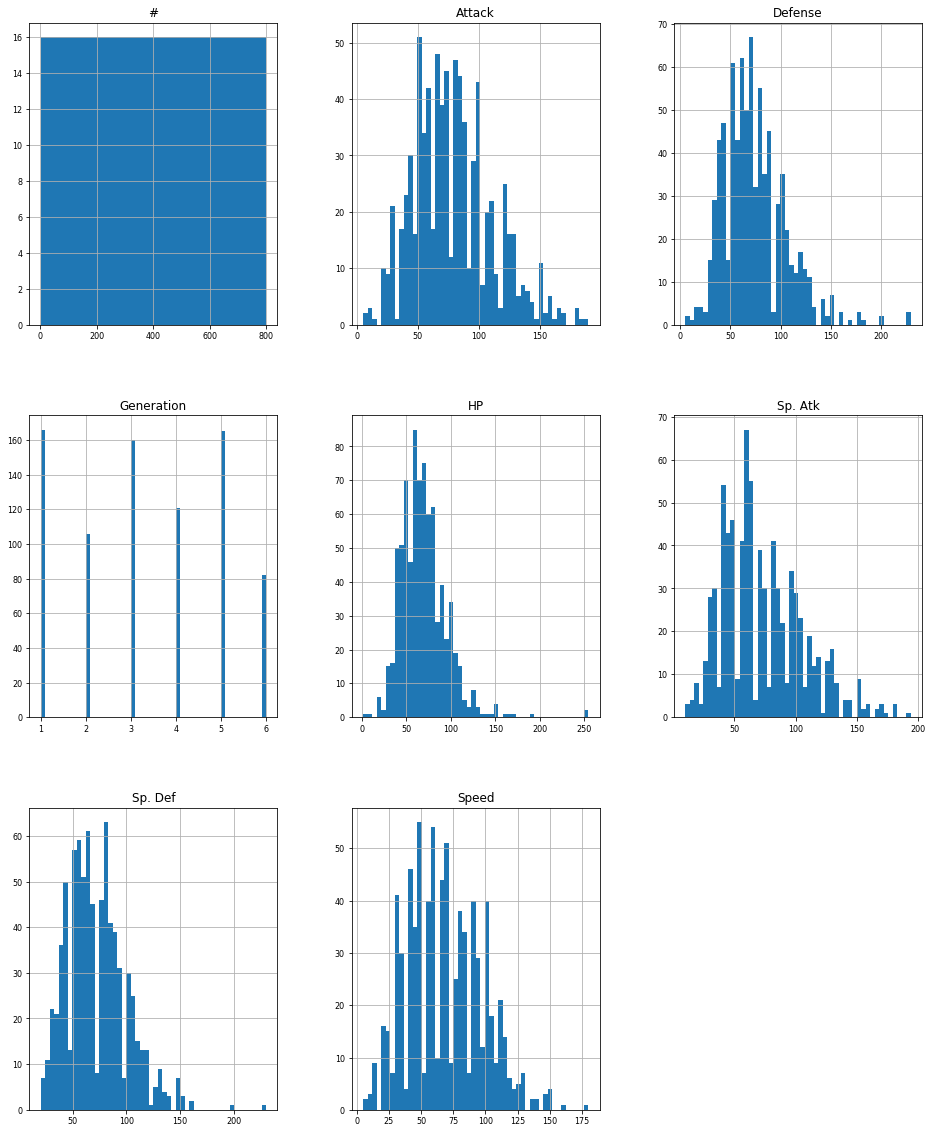

In [133]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### CORRELATION

In [137]:
data_num.corr()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


In [141]:
data_num_corr = data_num.corr()['Speed']#[:-1] # -1 because the latest row is Speed
golden_features_list = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Speed:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Speed:
Speed    1.0
Name: Speed, dtype: float64
